In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hourly_data = pd.read_csv('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/paper_params.txt')

In [ ]:
paper_params_2 = pd.read_csv('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/20230512-06-37-supermag.csv')

In [ ]:
hourly_data

,YEAR,DOY,HR,SCALAR_B,BY,BZ,SW_PLASMA,FLOW_PRESSURE,KP,DST,F107,AE
0,2020,81,0,5.5,-2.3,-2.0,395.0,1.05,17,-28,70.3,9999
1,2020,81,1,6.5,-1.0,0.9,398.0,0.98,17,-21,70.3,9999
2,2020,81,2,5.9,-2.7,-0.6,423.0,1.33,17,-16,70.3,9999
3,2020,81,3,6.3,-1.1,3.4,463.0,1.95,23,-11,70.3,9999
4,2020,81,4,6.0,-2.9,0.1,491.0,2.05,23,-8,70.3,9999
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,2020,135,19,2.3,-0.2,1.3,284.0,1.72,3,5,69.0,9999
1316,2020,135,20,3.0,1.8,1.6,289.0,1.41,3,6,69.0,9999
1317,2020,135,21,2.7,1.9,-0.5,294.0,1.64,3,10,69.0,9999
1318,2020,135,22,3.0,1.7,-0.8,294.0,1.53,3,9,69.0,9999


In [ ]:
hourly_data['AE'] = paper_params_2.groupby(paper_params_2.index // 60).mean()


<ipython-input-5-9b26babff176>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_data['AE'] = paper_params_2.groupby(paper_params_2.index // 60).mean()


In [ ]:
hourly_data

,YEAR,DOY,HR,SCALAR_B,BY,BZ,SW_PLASMA,FLOW_PRESSURE,KP,DST,F107,AE
0,2020,81,0,5.5,-2.3,-2.0,395.0,1.05,17,-28,70.3,121.350000
1,2020,81,1,6.5,-1.0,0.9,398.0,0.98,17,-21,70.3,94.000000
2,2020,81,2,5.9,-2.7,-0.6,423.0,1.33,17,-16,70.3,89.050000
3,2020,81,3,6.3,-1.1,3.4,463.0,1.95,23,-11,70.3,72.916667
4,2020,81,4,6.0,-2.9,0.1,491.0,2.05,23,-8,70.3,88.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,2020,135,19,2.3,-0.2,1.3,284.0,1.72,3,5,69.0,51.150000
1316,2020,135,20,3.0,1.8,1.6,289.0,1.41,3,6,69.0,37.850000
1317,2020,135,21,2.7,1.9,-0.5,294.0,1.64,3,10,69.0,37.600000
1318,2020,135,22,3.0,1.7,-0.8,294.0,1.53,3,9,69.0,43.866667


In [ ]:
hourly_data.loc[hourly_data['FLOW_PRESSURE'] == 99.99,['FLOW_PRESSURE']] = np.NaN 
hourly_data.loc[hourly_data['SW_PLASMA'] == 9999,['SW_PLASMA']] = np.NaN
hourly_data.iloc[952]

YEAR             2020.000000
DOY               120.000000
HR                 16.000000
SCALAR_B            3.200000
BY                 -1.900000
BZ                 -1.000000
SW_PLASMA                NaN
FLOW_PRESSURE            NaN
KP                  3.000000
DST                 6.000000
F107               71.000000
AE                 50.716667
Name: 952, dtype: float64

In [ ]:
daily_data = hourly_data.groupby(hourly_data.index // 24).mean().drop(columns = ['HR'])

In [ ]:
hourly_data['TIME'] = hourly_data['DOY'] + hourly_data['HR']/24

<ipython-input-10-71d01fb4eda8>:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(gs[0,0])


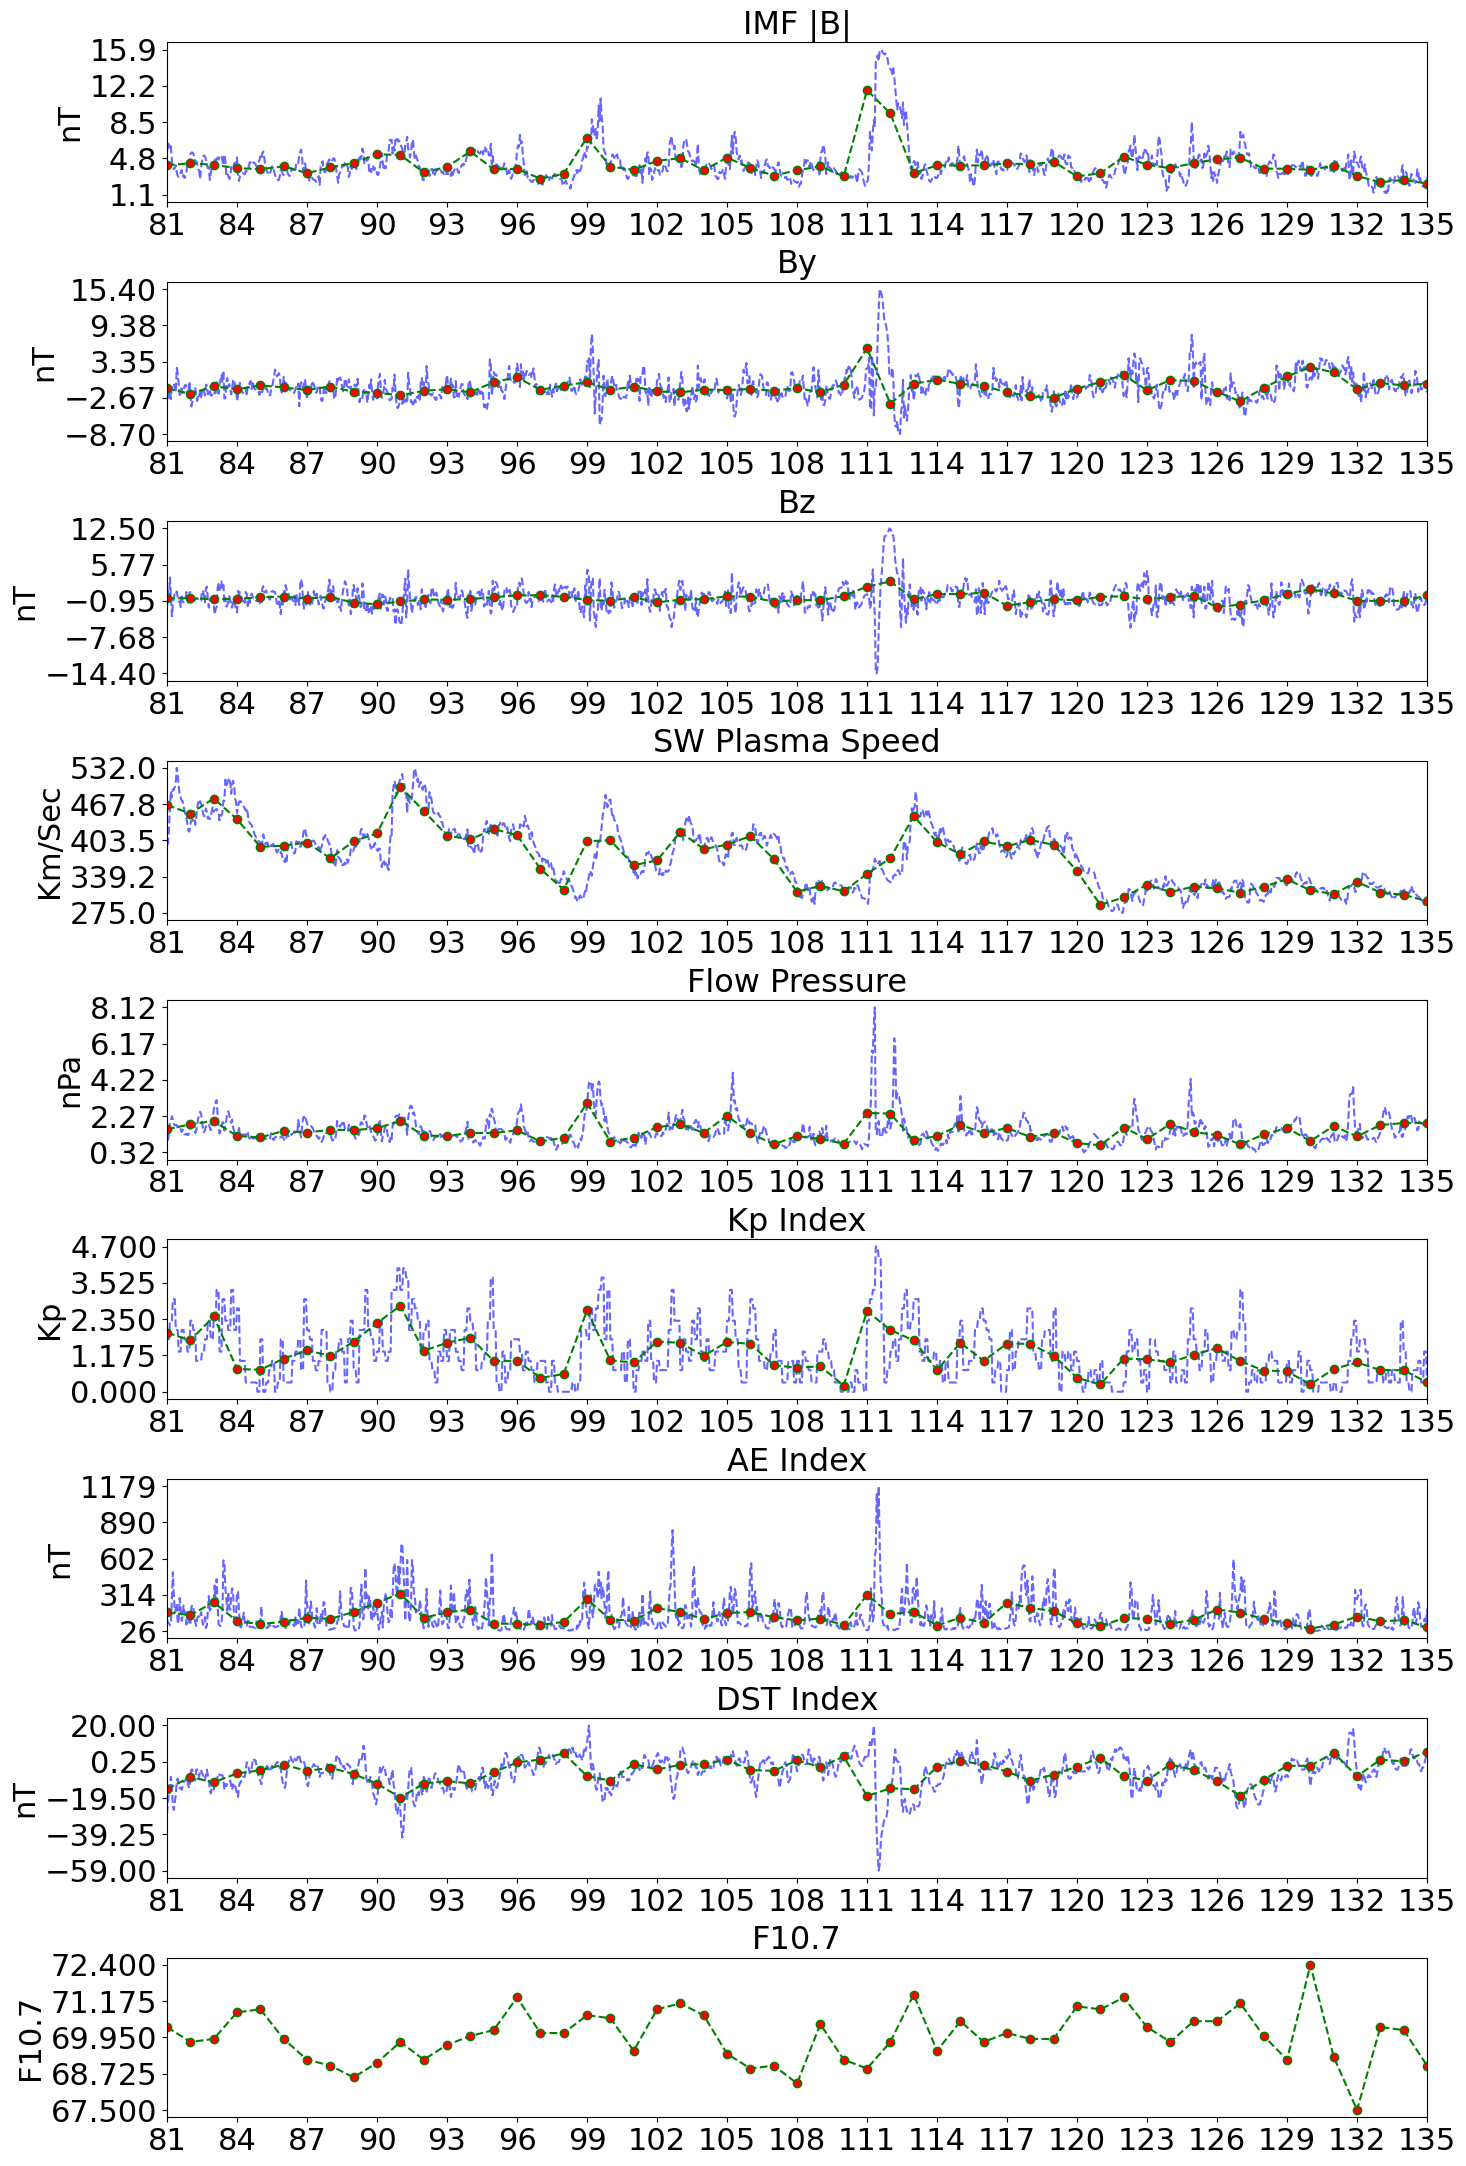

In [ ]:
import matplotlib.gridspec as gridspec
plt.rcParams.update({
    "font.size": 22,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgray",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})
# plt.figure(figsize = (14,25))
fig,ax=plt.subplots(figsize=(14,25))
gs = gridspec.GridSpec(9,1) 
######################################################
ax=plt.subplot(gs[0,0])
title='IMF |B|' 
var = 'SCALAR_B'
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax.plot(hourly_data['TIME'],hourly_data[var], color = 'b',linestyle='dashed',
  markerfacecolor='blue', alpha = 0.6)
ax.plot(daily_data['DOY'],daily_data[var], color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
# plt.xticks(daily_data['DOY'])
plt.ylabel("nT")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.linspace(hourly_data[var].min(), hourly_data[var].max(), 5))
plt.xlim([81,135])
# plt.ylim([0,15])
######################################################
ax=plt.subplot(gs[1,0])
title='By' 
var = 'BY'
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax.plot(hourly_data['TIME'],hourly_data[var], color = 'b',linestyle='dashed',
  markerfacecolor='blue', alpha = 0.6)
ax.plot(daily_data['DOY'],daily_data[var], color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
# plt.xticks(daily_data['DOY'])
plt.ylabel("nT")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.linspace(hourly_data[var].min(), hourly_data[var].max(), 5))
plt.xlim([81,135])
# plt.ylim([0,15])
######################################################
ax=plt.subplot(gs[2,0])
title='Bz' 
var = 'BZ'
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax.plot(hourly_data['TIME'],hourly_data[var], color = 'b',linestyle='dashed',
  markerfacecolor='blue', alpha = 0.6)
ax.plot(daily_data['DOY'],daily_data[var], color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
# plt.xticks(daily_data['DOY'])
plt.ylabel("nT")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.linspace(hourly_data[var].min(), hourly_data[var].max(), 5))
plt.xlim([81,135])
# plt.ylim([0,15])
######################################################
ax=plt.subplot(gs[3,0])
title='SW Plasma Speed' 
var = 'SW_PLASMA'
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax.plot(hourly_data['TIME'],hourly_data[var], color = 'b',linestyle='dashed',
  markerfacecolor='blue', alpha = 0.6)
ax.plot(daily_data['DOY'],daily_data[var], color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
# plt.xticks(daily_data['DOY'])
plt.ylabel("Km/Sec")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.linspace(hourly_data[var].min(), hourly_data[var].max(), 5))
plt.xlim([81,135])
# plt.ylim([0,15])
######################################################
ax=plt.subplot(gs[4,0])
title='Flow Pressure' 
var = 'FLOW_PRESSURE'
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax.plot(hourly_data['TIME'],hourly_data[var], color = 'b',linestyle='dashed',
  markerfacecolor='blue', alpha = 0.6)
ax.plot(daily_data['DOY'],daily_data[var], color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
# plt.xticks(daily_data['DOY'])
plt.ylabel("nPa")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.linspace(hourly_data[var].min(), hourly_data[var].max(), 5))
plt.xlim([81,135])
######################################################
ax=plt.subplot(gs[5,0])
title='Kp Index' 
var = 'KP'
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax.plot(hourly_data['TIME'],hourly_data[var] / 10, color = 'b',linestyle='dashed',
  markerfacecolor='blue', alpha = 0.6)
ax.plot(daily_data['DOY'],daily_data[var] / 10, color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
# plt.xticks(daily_data['DOY'])
plt.ylabel("Kp")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.linspace(hourly_data[var].min() / 10, hourly_data[var].max() / 10, 5))
plt.xlim([81,135])
# plt.ylim([0,15])
######################################################
ax=plt.subplot(gs[6,0])
title= 'AE Index'#'SW Plasma Speed' 
var = 'AE'#'SW_PLASMA'
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax.plot(hourly_data['TIME'],hourly_data[var], color = 'b',linestyle='dashed',
  markerfacecolor='blue', alpha = 0.6)
ax.plot(daily_data['DOY'],daily_data[var], color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
# plt.xticks(daily_data['DOY'])
plt.ylabel("nT")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.linspace(hourly_data[var].min(), hourly_data[var].max(), 5))
plt.xlim([81,135])
# plt.ylim([0,15])
######################################################
ax=plt.subplot(gs[7,0])
title= 'DST Index'#'Flow Pressure' 
var = 'DST'#'FLOW_PRESSURE'
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
ax.plot(hourly_data['TIME'],hourly_data[var], color = 'b',linestyle='dashed',
  markerfacecolor='blue', alpha = 0.6)
ax.plot(daily_data['DOY'],daily_data[var], color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
# plt.xticks(daily_data['DOY'])
plt.ylabel("nT")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.linspace(hourly_data[var].min(), hourly_data[var].max(), 5))
plt.xlim([81,135])
# plt.ylim([0,15])
######################################################
ax=plt.subplot(gs[8,0])
title= 'F10.7' 
var = 'F107'
# plt,ax2=weight_v_time_plot(ax2,Weight_df, pc_no, title)
# if (g_idx < 5):
#   plt.xlabel('')
# ax.plot(hourly_data['TIME'],hourly_data[var], color = 'b',linestyle='dashed',
  # markerfacecolor='blue', alpha = 0.6)
ax.plot(daily_data['DOY'],daily_data[var], color = 'g',linestyle='dashed', marker='o',
  markerfacecolor='red')#, linestyle='None',markersize = 10.0)#,label = 'April 19')
plt.ylabel("F10.7")
plt.title(title, fontsize=23)
# plt.xticks(rotation=45)
plt.xticks(np.arange(81, 135+3, 3.0))
plt.yticks(np.linspace(hourly_data[var].min(), hourly_data[var].max(), 5))
plt.xlim([81,135])
# plt.ylim([0,15])
######################################################
# plt.xticks(daily_data['DOY'])
# plt.xticks(np.arange(81, 135+3, 3.0))

left  = 0.1  # the left side of the subplots of the figure
right = 1   # the right side of the subplots of the figure
bottom = 0.07   # the bottom of the subplots of the figure
top = 0.9     # the top of the subplots of the figure
wspace = 0.5#0.2   # the amount of width reserved for blank space between subplots
hspace = 0.5#0.2   # the amount of height reserved for white space between subplots

plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
plt.savefig('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/atm_condn.jpeg',dpi = 300,bbox_inches = 'tight')
plt.show()

In [ ]:
!pip install waipy pycwt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
hourly_data['TIME'].iloc[-1] - hourly_data['TIME'].iloc[-2] - 0

0.041666666666685614

<ipython-input-77-b7f4c3b05de9>:122: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  bx=plt.subplot(gs[0,0])


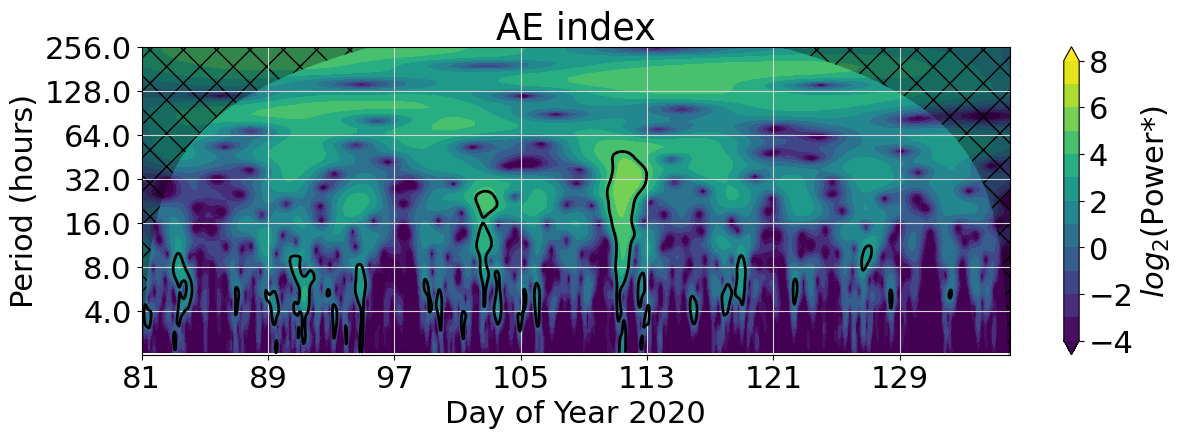

In [ ]:
from __future__ import division
import numpy
from matplotlib import pyplot

import pycwt as wavelet
from pycwt.helpers import find


sd_name='AE'
# select_time_idx= (datetime_array > datetime(2020,3,2))# & (datetime_array <= datetime(2020,4,28))
# Load and define the dataset
dat= hourly_data['AE'].values
title = "AE index"
label = title
units = ''
t0 = 81 # Start from day 81
dt = 1  # In days


# We also create a time array in years.
N = dat.size
t = hourly_data['TIME'].values#numpy.arange(0, N) * dt + t0

# We write the following code to detrend and normalize the input data by its
# standard deviation. Sometimes detrending is not necessary and simply
# removing the mean value is good enough. However, if your dataset has a well
# defined trend, such as the Mauna Loa CO\ :sub:`2` dataset available in the
# above mentioned website, it is strongly advised to perform detrending.
# Here, we fit a one-degree polynomial function and then subtract it from the
# original data.

p = numpy.polyfit(t - t0, dat, 1)
dat_notrend = dat - numpy.polyval(p, t - t0)
std = dat_notrend.std()  # Standard deviation
var = std ** 2  # Variance
dat_norm = dat_notrend / std  # Normalized dataset

# The next step is to define some parameters of our wavelet analysis. We
# select the mother wavelet, in this case the Morlet wavelet with
# :math:`\omega_0=6`.
mother = wavelet.Morlet(6)
s0 = 2 * dt  # Starting scale, in this case 2 * 0.25 years = 6 months
dj = 1 /12  # Twelve sub-octaves per octaves
J = 7 / dj  # Seven powers of two with dj sub-octaves
alpha, _, _ = wavelet.ar1(dat)  # Lag-1 autocorrelation for red noise

# The following routines perform the wavelet transform and inverse wavelet
# transform using the parameters defined above. Since we have normalized our
# input time-series, we multiply the inverse transform by the standard
# deviation.
wave, scales, freqs, coi, fft, fftfreqs = wavelet.cwt(dat_norm, dt, dj, s0, J,
                                                      mother)
# iwave = wavelet.icwt(wave, scales, dt, dj, mother) * std

# We calculate the normalized wavelet and Fourier power spectra, as well as
# the Fourier equivalent periods for each wavelet scale.
power = (numpy.abs(wave)) ** 2
fft_power = numpy.abs(fft) ** 2
period = 1 / freqs

# We could stop at this point and plot our results. However we are also
# interested in the power spectra significance test. The power is significant
# where the ratio ``power / sig95 > 1``.
signif, fft_theor = wavelet.significance(1.0, dt, scales, 0, alpha,
                                         significance_level=0.99,
                                         wavelet=mother)
sig95 = numpy.ones([1, N]) * signif[:, None]
sig95 = power / sig95

# # Then, we calculate the global wavelet spectrum and determine its
# # significance level.
# glbl_power = power.max(axis=1)
# dof = N - scales  # Correction for padding at edges
# glbl_signif, tmp = wavelet.significance(var, dt, scales, 1, alpha,
#                                         significance_level=0.95, dof=dof,
#                                        wavelet=mother)

# # We also calculate the scale average between 2 years and 8 years, and its
# # significance level.
# sel = find((period >= 2) & (period < 8))
# Cdelta = mother.cdelta
# scale_avg = (scales * numpy.ones((N, 1))).transpose()
# scale_avg = power / scale_avg  # As in Torrence and Compo (1998) equation 24
# scale_avg = var * dj * dt / Cdelta * scale_avg[sel, :].sum(axis=0)
# scale_avg_signif, tmp = wavelet.significance(var, dt, scales, 2, alpha,
#                                              significance_level=0.95,
#                                              dof=[scales[sel[0]],
#                                                   scales[sel[-1]]],
#                                              wavelet=mother)

# Finally, we plot our results in four different subplots containing the
# (i) original series anomaly and the inverse wavelet transform; (ii) the
# wavelet power spectrum (iii) the global wavelet and Fourier spectra ; and
# (iv) the range averaged wavelet spectrum. In all sub-plots the significance
# levels are either included as dotted lines or as filled contour lines.

# Prepare the figure
# pyplot.close('all')
# pyplot.ioff()
# figprops = dict(figsize=(14,4), dpi=72)
# fig = pyplot.figure(**figprops)

plt.rcParams.update({
    "font.size": 22,
    "lines.color": "black",
    "patch.edgecolor": "black",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "black",
    "axes.labelcolor": "black",
    "xtick.color": "black",
    "ytick.color": "black",
    "grid.color": "lightgrey",
    "figure.facecolor": "white",
    "figure.edgecolor": "white",
    "savefig.facecolor": "white",
    "savefig.edgecolor": "white"})

fig,ax=plt.subplots(figsize=(14,4))#fig=pp.figure(figsize=(12,10)
gs = gridspec.GridSpec(1, 1) 

bx=plt.subplot(gs[0,0])
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16,32,64,128,256]
im=bx.contourf(t, numpy.log2(period), numpy.log2(power), numpy.log2(levels),
            extend='both', cmap=pyplot.cm.viridis)
extent = [t.min(), t.max(), 0, max(period)]
bx.contour(t, numpy.log2(period), sig95, [-99, 1], colors='k', linewidths=2,
           extent=extent)
bx.fill(numpy.concatenate([t, t[-1:] + dt, t[-1:] + dt,
                           t[:1] - dt, t[:1] - dt]),
        numpy.concatenate([numpy.log2(coi), [1e-9], numpy.log2(period[-1:]),
                           numpy.log2(period[-1:]), [1e-9]]),
        'k', alpha=0.3, hatch='x')
bx.set_title('{}'.format(label))
bx.set_ylabel('Period (hours)')
#
Yticks = 2 ** numpy.arange(numpy.ceil(numpy.log2(period.min())),
                           numpy.ceil(numpy.log2(period.max())))
bx.set_yticks(numpy.log2(Yticks))
bx.set_yticklabels(Yticks)
color_bar=fig.colorbar(im,extend='max')
color_bar.set_label('$log_2$(Power*)')
bx.set_ylim(np.log2([2,256]))
bx.set_xlim([np.min(t),np.max(t)])
bx.set_xticks(np.arange(int(min(t)), int(max(t)),8))
bx.set_xlabel('Day of Year 2020')
bx.grid()

pyplot.savefig('/content/drive/MyDrive/GOLD_DATA/paper_plots_data/' + 'AE_wavelet_round_2' + '.jpeg', dpi = 300, bbox_inches = 'tight')


pyplot.show()

In [ ]:
period

array([ 0.08608697,  0.09120597,  0.09662936,  0.10237524,  0.10846279,
        0.11491232,  0.12174536,  0.12898472,  0.13665455,  0.14478045,
        0.15338954,  0.16251056,  0.17217394,  0.18241194,  0.19325871,
        0.20475048,  0.21692557,  0.22982464,  0.24349072,  0.25796943,
        0.2733091 ,  0.2895609 ,  0.30677909,  0.32502112,  0.34434788,
        0.36482387,  0.38651743,  0.40950095,  0.43385115,  0.45964928,
        0.48698145,  0.51593887,  0.54661819,  0.5791218 ,  0.61355817,
        0.65004224,  0.68869577,  0.72964775,  0.77303486,  0.8190019 ,
        0.86770229,  0.91929855,  0.97396289,  1.03187774,  1.09323638,
        1.1582436 ,  1.22711635,  1.30008448,  1.37739153,  1.45929549,
        1.54606972,  1.63800381,  1.73540458,  1.83859711,  1.94792578,
        2.06375548,  2.18647276,  2.3164872 ,  2.4542327 ,  2.60016897,
        2.75478306,  2.91859099,  3.09213944,  3.27600762,  3.47080917,
        3.67719422,  3.89585157,  4.12751096,  4.37294553,  4.63

In [ ]:
# t / 